# Proyecto Sprint 10

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Objetivos](#obj)
* [Etapa 1. Descripción de los datos](#data_review)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
* [Etapa 3. Desarrollo de modelos](#modelo)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
Trabajas en OilyGiant, una compañía dedicada a la extracción de petróleo. La empresa está interesada en expandir sus operaciones abriendo 200 nuevos pozos petrolíferos y necesita identificar las ubicaciones más rentables para hacerlo. 

## Objetivos: <a id='obj'></a>
El objetivo principal del proyecto es encontrar las mejores ubicaciones para abrir los nuevos pozos petrolíferos en tres regiones distintas. Esto se logrará mediante el análisis de datos históricos de exploración y producción de petróleo, la creación de modelos de predicción del volumen de reservas y la evaluación de los riesgos y beneficios asociados con cada región.

## Etapas:
El proyecto consistirá en tres etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Desarrollo de modelos.


## Etapa 1. Descripción de los datos <a id='data_review'></a>

Los datos proporcionados consisten en información de exploración geológica y producción de petróleo de tres regiones distintas. Cada conjunto de datos incluye:

id: Identificador único del pozo de petróleo.

f0, f1, f2: Tres características geológicas de los puntos (su significado específico no es relevante para el modelo).

product: Volumen de reservas en el pozo de petróleo (medido en miles de barriles).

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing)'>

In [1]:
# Importamos librerias necesarias
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploracion Inicial de Datos

In [3]:
# Cargamos el dataset
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Observamos el contenido
print(data_0.info(), data_0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None       id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [4]:
print(data_1.info(), data_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None       id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [5]:
print(data_2.info(), data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None       id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


## Analisis de Datos

Observamos que los 3 datasets estan completos y tienen el tipo adecuado de datos. Eliminaremos el id ya que no es relevante, y clasificaremos el f0, f1 y f2 como feautures y el product como target.

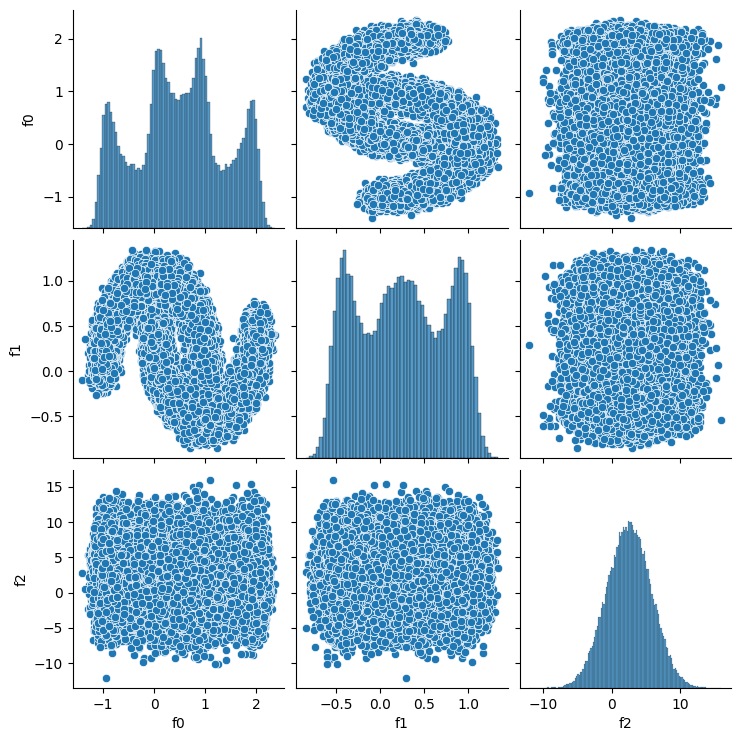

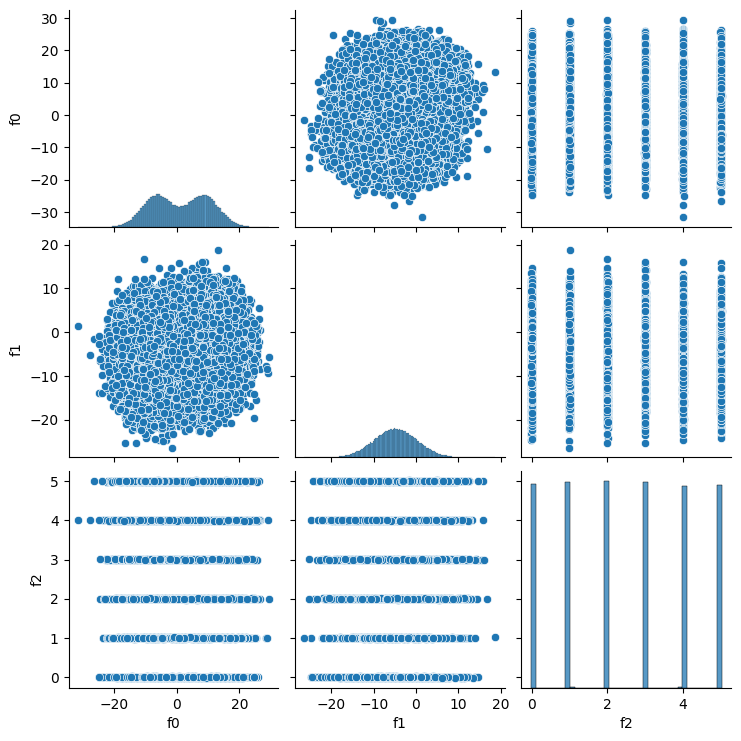

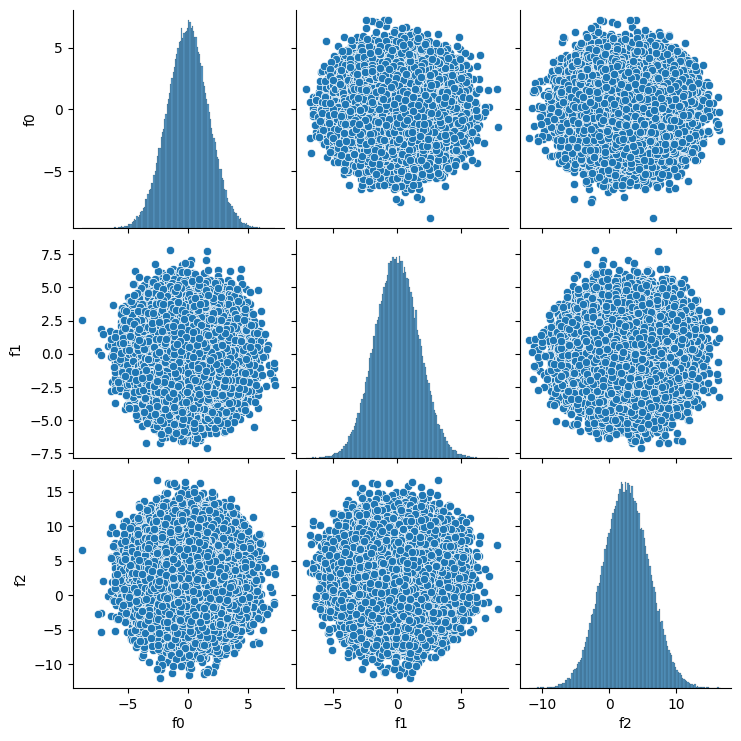

In [6]:
sns.pairplot(data_0[['f0', 'f1', 'f2']])
sns.pairplot(data_1[['f0', 'f1', 'f2']])
sns.pairplot(data_2[['f0', 'f1', 'f2']])
plt.show()

Se observa los features del data_2 en la diagonal (histogramas) como una distribucion normal, mientras en las otras diagonales de los otros dos datasets parecen tener datos sesgados simetricos. Los scatter plots que estan fuera de la diagonal en el data_2 muestran un conjunto en forma de circulo que pudiera indicar que no hay una relación clara. En el data_1 forman una línea, esto podría indicar que hay una correlación entre las características. Por ultimo, en el data_0 forman una curva en forma de S, esto podría indicar que hay una correlación entre las características. 

## Etapa 3. Desarrollo de modelos <a id='modelo'></a>

In [7]:
# Eliminamos la columna id y preparamos los datos

def preparar_datos(data):
    data = data.drop(['id'], axis=1)
    features = data.drop(['product'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

# Dividimos los datos del dataset en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25
features_train_0, features_valid_0, target_train_0,  target_valid_0 = preparar_datos(data_0)
features_train_1, features_valid_1, target_train_1,  target_valid_1 = preparar_datos(data_1)
features_train_2, features_valid_2, target_train_2,  target_valid_2 = preparar_datos(data_2)

# Entrenamos el modelo y hacemos predicciones para el conjunto de validación
def entrenar_modelo(features_train, target_train, features_valid, target_valid):
    model= LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    return predictions, rmse

predictions_0, rmse_0 = entrenar_modelo(features_train_0, target_train_0, features_valid_0, target_valid_0)
predictions_1, rmse_1 = entrenar_modelo(features_train_1, target_train_1, features_valid_1, target_valid_1)
predictions_2, rmse_2 = entrenar_modelo(features_train_2, target_train_2, features_valid_2, target_valid_2)

# Imprimir los resultados
print(f"RMSE Region 0: {rmse_0}, Volumen Medio: {predictions_0.mean()}")
print(f"RMSE Region 1: {rmse_1}, Volumen Medio: {predictions_1.mean()}")
print(f"RMSE Region 2: {rmse_2}, Volumen Medio: {predictions_2.mean()}")

RMSE Region 0: 37.5794217150813, Volumen Medio: 92.59256778438035
RMSE Region 1: 0.893099286775617, Volumen Medio: 68.728546895446
RMSE Region 2: 40.02970873393434, Volumen Medio: 94.96504596800489


Esto indica que el valor del dataset 1 es mas preciso ya que tiene menos error con 0.893. Sin embargo el modelo que tiene mas volumen medio es el datset 2 con 94.965 miles de barriles.

In [10]:
# Cálculo de ganancias: Almacenamos todos los valores necesarios para los cálculos en variables separadas.
df_region_0 = pd.DataFrame({'predicciones':predictions_0 , 'reales':target_valid_0})
df_region_1 = pd.DataFrame({'predicciones':predictions_1 , 'reales':target_valid_1})
df_region_2 = pd.DataFrame({'predicciones':predictions_2 , 'reales':target_valid_2})

def ganancia(df_region, precio_por_unidad=4500, costo_por_pozo=500000):
    top_200 = df_region.sort_values(by='predicciones', ascending=False)[:200]
    ganancia_total = ((top_200['reales'] * precio_por_unidad).sum() - (costo_por_pozo * 200) ) / 100000
    return ganancia_total    

ganancia_0 = ganancia(df_region_0)
ganancia_1 = ganancia(df_region_1)
ganancia_2 = ganancia(df_region_2)

print(f"Ganancia Región 0: {ganancia_0}")
print(f"Ganancia Región 1: {ganancia_1}")
print(f"Ganancia Región 2: {ganancia_2}")

Ganancia Región 0: 332.0826043139851
Ganancia Región 1: 241.50866966815084
Ganancia Región 2: 271.0349963599831


Comparando con la media de las regiones, ni una llega al minimo de unidades para evitar perdidas ya que todos son menores a 111 unidades. Ademas la region 0 es el que tiene una mayor ganancia con 399.604 millones de dolares.

In [11]:
def bootstrapping(df_region, n_samples=1000, sample_size=500):
    state = np.random.RandomState(12345)
    values = []

    for _ in range(n_samples):
        target_subsample = df_region.sample(n=sample_size, replace=True, random_state=state)

        values.append(ganancia(target_subsample))
        
    values = pd.Series(values)
    cantidad_negativas = len(values[values < 0])
    riesgo = cantidad_negativas / n_samples
    lower = values.quantile(0.05)
    upper = values.quantile(0.95)
    mean = values.mean()

    return riesgo, mean, lower, upper

# Calcular ganancias para cada región
riesgo_0, mean_0, lower_0, upper_0 = bootstrapping(df_region_0)
riesgo_1, mean_1, lower_1, upper_1 = bootstrapping(df_region_1)
riesgo_2, mean_2, lower_2, upper_2 = bootstrapping(df_region_2)

print(f"Región 0: Riesgo: {riesgo_0}, Ingresos Promedio: {mean_0}, Cuantil 5%: {lower_0}, Cuantil 95%: {upper_0}")
print(f"Región 1: Riesgo: {riesgo_1}, Ingresos Promedio: {mean_1}, Cuantil 5%: {lower_1}, Cuantil 95%: {upper_1}")
print(f"Región 2: Riesgo: {riesgo_2}, Ingresos Promedio: {mean_2}, Cuantil 5%: {lower_2}, Cuantil 95%: {upper_2}")

Región 0: Riesgo: 0.069, Ingresos Promedio: 39.616498480237105, Cuantil 5%: -3.7181596262545584, Cuantil 95%: 84.26881611281351
Región 1: Riesgo: 0.015, Ingresos Promedio: 45.60451057866613, Cuantil 5%: 10.947572145480224, Cuantil 95%: 79.10055132594589
Región 2: Riesgo: 0.076, Ingresos Promedio: 40.44038665683569, Cuantil 5%: -5.853344105050087, Cuantil 95%: 84.11239967081366


La region 1 es la que tiene mas ingresos promedio con 45.60 millones, el riesgo mas alto es la region 2 con 0.076 (7.6%). Ademas la región 1 tiene ambos percentiles (5% y 95%) en valores positivos, lo que indica una mayor estabilidad en los ingresos esperados.

## Conclusion <a id='end'></a>

En este proyecto, se desarrolló un modelo de machine learning para predecir el volumen de reservas de petróleo y optimizar la selección de ubicaciones para abrir 200 nuevos pozos petrolíferos en OilyGiant. 

La región 1 parece ser la mejor opción en términos de menor riesgo y mayor ingreso promedio. Sus ingresos también son más estables dentro de un rango positivo. Por otro lado, la región 0 y región 2 tienen riesgos más altos y la posibilidad de obtener pérdidas según el cuantil del 5% en negativo.

En cuanto al entrenamiento, la region 1 es la que tiene mejor precision en cuanto al modelo.